In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('data.csv',encoding = 'gb18030')

In [185]:
x = data.drop('status',axis=1)
y = data.status
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state =2018,shuffle = True,stratify = y) 
#shuffle 跟random_state是什么关系？ 只有shuffle为真时，random_state才会起作用,而且此时，无法进行分层stratified。
# shuffle为True,即按照random_state状态进行shuffle.分层是严格按照30%比例进行，不分层的话因为是随机数进行shuffle，所以是在30%上下浮动

In [187]:
y_train[y_train == 1].size,y_test[y_test == 1].size ,y_train[y_train == 0].size,y_test[y_test == 0].size

(835, 358, 2492, 1069)

In [14]:
data.info() 
#90列   4753行

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null float64
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobilit

In [189]:
stats = []
#计算每一列的  列名  列包含多少类  列空的比例  列最多的元素所占比例  列类型
for col in data.columns:
    stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
#   将缺失值 按照降序排列 
stats_df.sort_values('Percentage of values in the biggest category', ascending=False)[:10] 

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
45,source,1,0.000000,100.000000,object
2,trade_no,1,0.000000,100.000000,float64
3,bank_card_no,1,0.000000,100.000000,object
43,jewelry_consume_count_last_6_month,7,0.252419,98.927219,float64
16,is_high_user,2,0.000000,98.885149,int64
40,railway_consume_count_last_12_month,6,0.252419,97.833403,float64
44,status,2,0.000000,74.905343,int64
28,reg_preference_for_trad,5,0.042070,71.581826,object
33,cross_consume_count_last_1_month,19,8.960875,64.535128,float64
14,student_feature,2,63.062684,63.062684,float64


([<matplotlib.patches.Wedge at 0xb4d3cf8>,
 [Text(-0.775501,0.780127,'due'), Text(0.846001,-0.851048,'overdue')],
 [Text(-0.423001,0.425524,'74.91%'), Text(0.493501,-0.496444,'25.09%')])

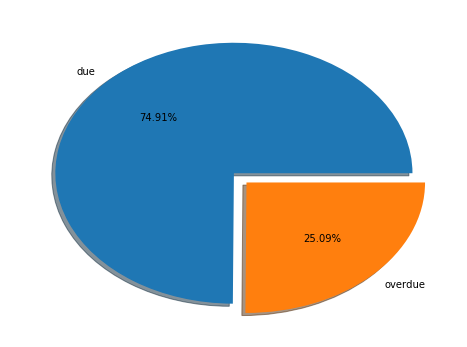

In [63]:
# 查看逾期与不逾期的比例
target_col = 'status'
labels = ['due','overdue']
due = data.loc[(data[target_col] == 0)].shape[0] #  (data[target_col] == 0).sum()
overdue = data.loc[(data[target_col] == 1)].shape[0]
x = [due,overdue] 

plt.figure(figsize=(8,6))
explode = [0, 0.1] # 0.1 凸出这部分，
#plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse


plt.pie(x,labels =labels,autopct='%1.2f%%',explode=explode,shadow=True)